In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.externals
import joblib 
import IPython.display 
import sklearn.tree 
import pydotplus
import os

In [2]:
dataset = pd.read_csv("lv1.csv")
print(dataset.shape)

(1167136, 36)


In [3]:
print(dataset.groupby('Label').size())

Label
DoH       269643
NonDoH    897493
dtype: int64


In [4]:
null = dataset.isnull()
print(dataset.isnull().any().any())
print(null.sum())
dataset['ResponseTimeTimeMedian'] = dataset['ResponseTimeTimeMedian'].fillna(0)
dataset['ResponseTimeTimeSkewFromMedian'] = dataset['ResponseTimeTimeSkewFromMedian'].fillna(0)
null = dataset.isnull()
print("New: ", dataset.isnull().any().any())
print("New: ", null.sum())

True
Unnamed: 0                                   0
SourceIP                                     0
DestinationIP                                0
SourcePort                                   0
DestinationPort                              0
TimeStamp                                    0
Duration                                     0
FlowBytesSent                                0
FlowSentRate                                 0
FlowBytesReceived                            0
FlowReceivedRate                             0
PacketLengthVariance                         0
PacketLengthStandardDeviation                0
PacketLengthMean                             0
PacketLengthMedian                           0
PacketLengthMode                             0
PacketLengthSkewFromMedian                   0
PacketLengthSkewFromMode                     0
PacketLengthCoefficientofVariation           0
PacketTimeVariance                           0
PacketTimeStandardDeviation                  0
PacketTi

In [5]:
dataset.columns
cols = dataset.drop(labels = ['Unnamed: 0','TimeStamp'], axis = 1)
cols.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'Duration', 'FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived',
       'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [6]:
array = cols.values
print(array)
X = array[:,0:33]
Y = array[:,33]
#Y = Y.astype('int')
validation_size = 0.30
seed = 65
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

[[19216820191.0 176103000000.0 50749 ... 0.024714815 1.174947648 'DoH']
 [19216820191.0 176103000000.0 50749 ... -0.07584524 1.402381756 'DoH']
 [19216820191.0 176103000000.0 50749 ... 0.085061157 0.958347923 'DoH']
 ...
 [19216820112.0 2319321683.0 35304 ... 0.259020053 3.860695701 'NonDoH']
 [19216820112.0 1823649179.0 45038 ... 2.542483324 0.004405953 'NonDoH']
 [19216820112.0 2319321683.0 35308 ... 0.216579876 4.617112369 'NonDoH']]


In [7]:
scoring = 'accuracy'
print(scoring)
X_test.shape

accuracy


(350141, 33)

In [8]:
models = []
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RandomForestClassifier()))

print(models)

[('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier())]


In [9]:
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

[0.99831088 0.9984394  0.99828028 0.99812728 0.99818236]
ETC Accuracy: 0.998268 (+/- 0.000108)
[0.99993268 0.99991432 0.99988984 0.99991432 0.99986536]
RFC Accuracy: 0.999903 (+/- 0.000023)


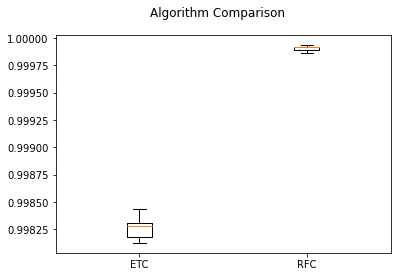

In [10]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ETC Accuracy test set result
0.9984377722117661
ETC accuracy test:
 0.9984377722117661

Confusion Matrix:
 [[ 80008    516]
 [    31 269586]]

Classfication report:
               precision    recall  f1-score   support

         DoH       1.00      0.99      1.00     80524
      NonDoH       1.00      1.00      1.00    269617

    accuracy                           1.00    350141
   macro avg       1.00      1.00      1.00    350141
weighted avg       1.00      1.00      1.00    350141



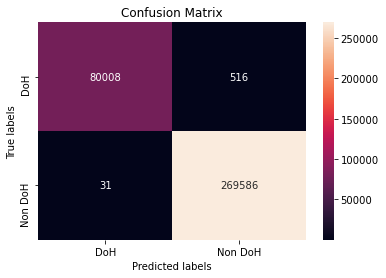

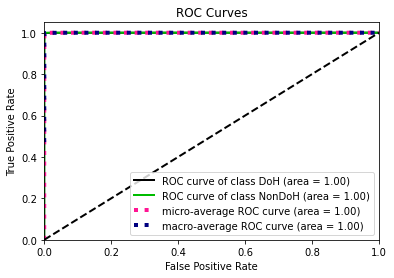

Validating Feature importance
[0.00395153 0.06440727 0.04537512 0.01897961 0.11315339 0.0195782
 0.01101215 0.01311617 0.0090873  0.01824391 0.03081403 0.03680917
 0.02336985 0.04724973 0.02828871 0.02071193 0.04672073 0.04344657
 0.08709264 0.0691578  0.05057508 0.00176236 0.04116331 0.01126431
 0.0287295  0.00508526 0.00884852 0.01041058 0.01409445 0.00691195
 0.02944895 0.02592871 0.01521122]


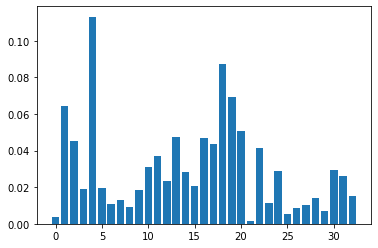

<AxesSubplot:>

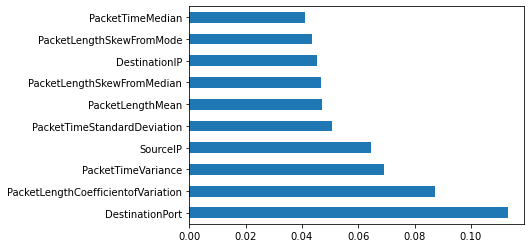

In [11]:
print("ETC Accuracy test set result")
etc = ExtraTreesClassifier()
etc.fit(X_train, Y_train)
filename = 'finalized_RFC_model.sav'
joblib.dump(etc, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)

predictions_etc = etc.predict(X_test)
print("ETC accuracy test:\n",accuracy_score(Y_test, predictions_etc))
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, predictions_etc))
print("\nClassfication report:\n",classification_report(Y_test, predictions_etc))

from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
cf_matrix=confusion_matrix(Y_test, predictions_etc)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['DoH', 'Non DoH']); ax.yaxis.set_ticklabels(['DoH', 'Non DoH']);
cf_matrix=confusion_matrix(Y_test, predictions_etc)

import scikitplot as skplt #to make things easy
y_pred_proba = etc.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_pred_proba)
plt.show()

print ("Validating Feature importance")
#fit an Extra Trees model to the data
test_model = ExtraTreesClassifier()
test_model.fit(X_train, Y_train)
#display the relative importance of each attribute
print(test_model.feature_importances_)
#plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()

df = dataset.reset_index(drop = False)
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[0:33])
feat_importances.nlargest(10).plot(kind='barh')

RFC Accuracy test set result
0.9999286001924939
RFC accuracy test:
 0.9999286001924939

Confusion Matrix:
 [[ 80504     20]
 [     5 269612]]

Classfication report:
               precision    recall  f1-score   support

         DoH       1.00      1.00      1.00     80524
      NonDoH       1.00      1.00      1.00    269617

    accuracy                           1.00    350141
   macro avg       1.00      1.00      1.00    350141
weighted avg       1.00      1.00      1.00    350141



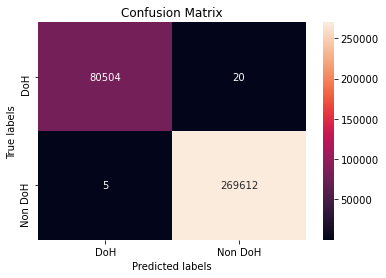

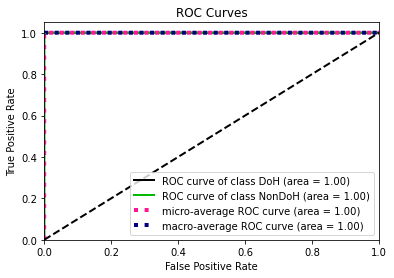

Validating Feature importance
[0.01851137 0.27861728 0.01166704 0.00966061 0.09369144 0.02833438
 0.01244013 0.01623575 0.01349668 0.0191279  0.01874514 0.01986746
 0.02320108 0.16710623 0.00873916 0.02325738 0.01523712 0.04565575
 0.05028391 0.02939969 0.03618668 0.00179934 0.00532093 0.00422019
 0.00747115 0.00166215 0.00221838 0.00560981 0.01770546 0.00296473
 0.00107669 0.00382009 0.00666891]


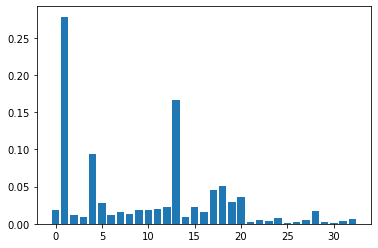

<AxesSubplot:>

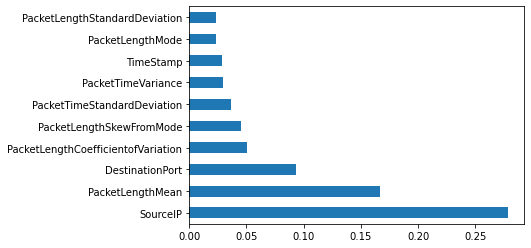

In [12]:
print("RFC Accuracy test set result")
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, Y_train)
filename = 'finalized_RFC_model.sav'
joblib.dump(rfc, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)

predictions_rfc = rfc.predict(X_test)
print("RFC accuracy test:\n",accuracy_score(Y_test, predictions_rfc))
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, predictions_rfc))
print("\nClassfication report:\n",classification_report(Y_test, predictions_rfc))

from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
cf_matrix=confusion_matrix(Y_test, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['DoH', 'Non DoH']); ax.yaxis.set_ticklabels(['DoH', 'Non DoH']);
cf_matrix=confusion_matrix(Y_test, predictions_rfc)

import scikitplot as skplt #to make things easy
y_pred_proba = rfc.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_pred_proba)
plt.show()

print ("Validating Feature importance")
# fit an Extra Trees model to the data
test_model = RandomForestClassifier()
test_model.fit(X_train, Y_train)
# display the relative importance of each attribute
print(test_model.feature_importances_)
# plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()
#
df = dataset.reset_index(drop = False)
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[0:33])
feat_importances.nlargest(10).plot(kind='barh')